## Gradient Descent
Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. In machine learning, this function is typically a cost function (or loss function) that measures the difference between predicted values and actual values. The goal is to find the set of parameters (weights and biases) that minimize the cost function.

### 1. Batch Gradient Descent (BGD)
- Definition: BGD calculates the gradient of the cost function using the entire training dataset in each iteration. It then updates the model parameters in the opposite direction of the gradient.

- Features:
    - Stable convergence to a local minimum (for convex problems, the global minimum).
    - Can be slow for large datasets.

- Initialization:

    - Learning Rate (α): A crucial hyperparameter that controls the step size in the gradient direction. Typically initialized to a small value (e.g., 0.01, 0.001).

    - Initial Parameters (θ): Weights and biases are often initialized randomly or to small values (e.g., using a normal distribution with a small standard deviation). Zero initialization can sometimes lead to issues (e.g., symmetric updates).

- Advantages:

    - Guaranteed convergence to the global minimum for convex cost functions.

    - Directly related to the cost function (the gradient is calculated accurately).

- Drawbacks:

    - Slow for large datasets because it processes the entire dataset in each iteration.

    - May get stuck in local minima for non-convex cost functions.

- Mathematical Notation:

θ = θ - α ∇J(θ)

Where:
- θ: Model parameters (weights and biases)

- α: Learning rate

- ∇J(θ): Gradient of the cost function J(θ) with respect to θ, calculated using the entire dataset

Theta (BGD): [[-0.09669645]
 [ 1.16059273]]


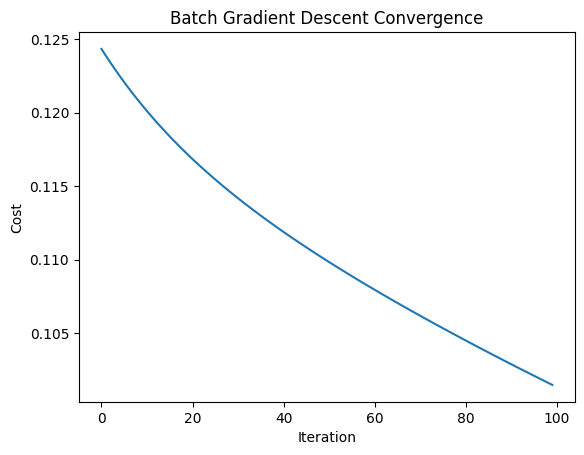

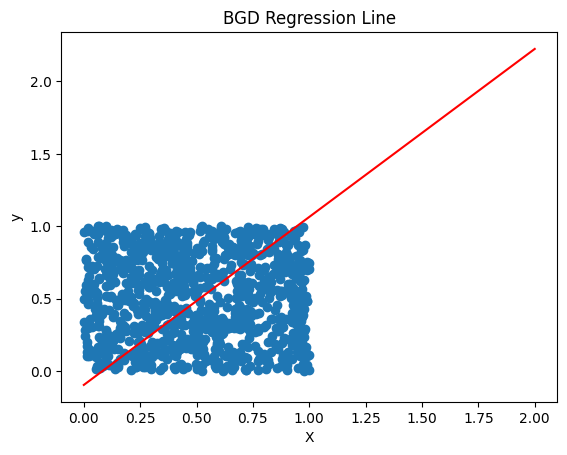

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)

# Add a bias term to X
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.01  # learning rate
n_iterations = 100
m = 1000  # number of samples

theta = np.random.randn(2, 1)  # Random initialization

# Batch Gradient Descent
costs = []
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_pred = X_b.dot(theta)
    cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
    costs.append(cost)

print("Theta (BGD):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Batch Gradient Descent Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("BGD Regression Line")
plt.show()

<!-- filepath: /d:/MSIS/MLPA/SGD_Details.md -->

### Stochastic Gradient Descent (SGD)

#### Definition
SGD calculates the gradient of the cost function using only one randomly selected data point in each iteration.

#### Features
- **Very fast updates:** Suitable for large datasets.
- **Noisy updates:** Can help escape local minima.
- **Less stable convergence:** Compared to Batch Gradient Descent (BGD).

#### Initialization
- **Learning Rate (α):** Same as BGD but often needs to be smaller due to the noisy updates. Learning rate schedules (decay) are frequently used.
- **Initial Parameters (θ):** Similar to those in BGD.

#### Advantages
- Much faster than BGD, especially for large datasets.
- Can escape local minima due to the noisy updates.

#### Drawbacks
- Noisy updates cause oscillations around the minimum.
- More difficult to converge compared to BGD, requiring careful tuning of the learning rate.

#### Mathematical Notation
$$
\theta = \theta - \alpha \nabla J\left(\theta; x^{(i)}, y^{(i)}\right)
$$

Where:

*   θ: Model parameters
*   α: Learning rate
*   ∇J(θ; x<sup>(i)</sup>, y<sup>(i)</sup>): Gradient of the cost function J(θ) with respect to θ, calculated using a single data point (x<sup>(i)</sup>, y<sup>(i)</sup>).

Theta (SGD): [[0.47539224]
 [0.01605387]]


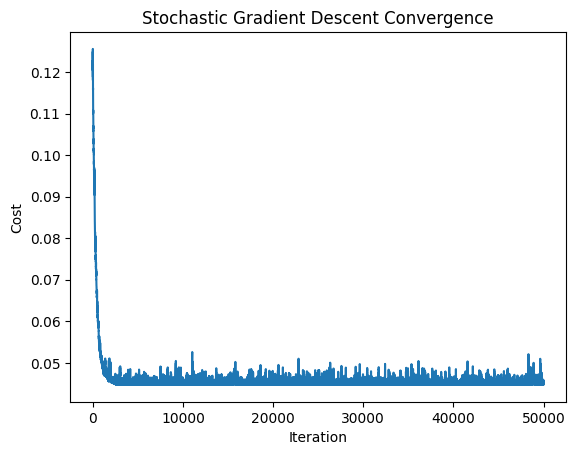

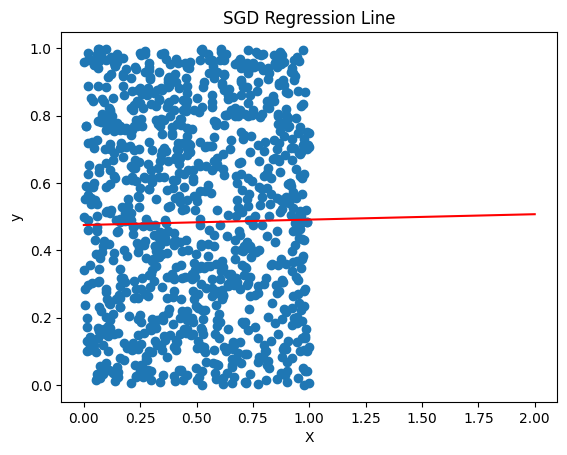

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.01 # learning rate
n_epochs = 50 # passes through the training set
m = 1000

theta = np.random.randn(2, 1)

# Stochastic Gradient Descent
costs = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)

print("Theta (SGD):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Stochastic Gradient Descent Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("SGD Regression Line")
plt.show()

<!-- filepath: mini-batch-gradient-descent.md -->

### Mini-Batch Gradient Descent

#### Definition

Mini-Batch Gradient Descent is a compromise between Batch Gradient Descent (BGD) and Stochastic Gradient Descent (SGD). It calculates the gradient of the cost function using a small batch of randomly selected data points in each iteration.

#### Features

- **Faster Updates**: More frequent parameter updates compared to BGD.
- **Smoother Convergence**: More stable convergence than SGD.
- **Efficient Computation**: Leverages vectorized operations.

#### Initialization

- **Learning Rate (α)**: Similar to what's used in SGD.
- **Batch Size**: A hyperparameter determining the number of data points in each batch (e.g., 32, 64, 128, 256).
- **Initial Parameters (θ)**: Same as in BGD and SGD.

#### Advantages

- Provides more stable convergence compared to SGD.
- Can be computationally efficient due to the use of vectorized operations.

#### Drawbacks

- Requires careful tuning of both the learning rate and batch size.
- May still get stuck in local minima.

#### Mathematical Notation

The update rule for Mini-Batch Gradient Descent is given by:

θ = θ - α ∇J(θ; B^(t))

Where:

- **θ**: Model parameters.
- **α**: Learning rate.
- **∇J(θ; B^(t))**: Gradient of the cost function J(θ) with respect to θ, calculated using the mini-batch of data B^(t).

Theta (Mini-Batch): [[0.42109629]
 [0.16865768]]


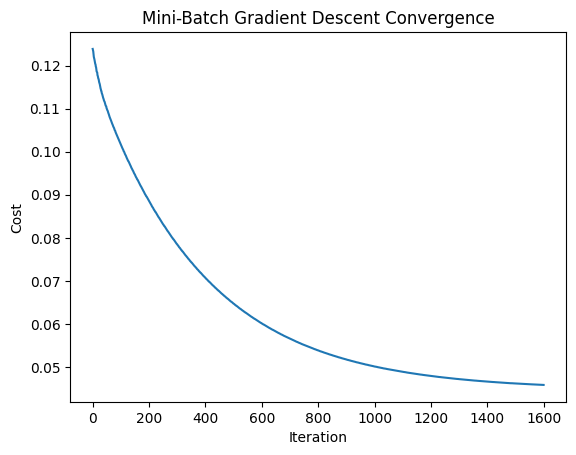

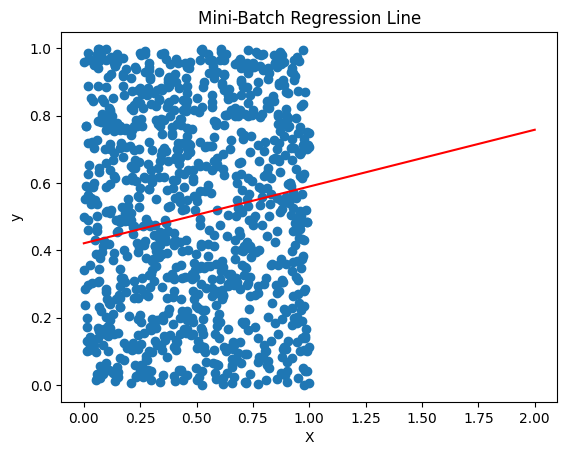

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.01
n_epochs = 50
m = 1000
batch_size = 32

theta = np.random.randn(2, 1)

# Mini-Batch Gradient Descent
costs = []
for epoch in range(n_epochs):
    for i in range(0, m, batch_size):
        X_batch = X_b[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        gradients = 2/batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
        theta = theta - eta * gradients
        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)


print("Theta (Mini-Batch):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Mini-Batch Gradient Descent Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Mini-Batch Regression Line")
plt.show()

<!-- filepath: gradient-descent-with-momentum.md -->

### Gradient Descent with Momentum

#### Definition

Momentum helps accelerate gradient descent in the relevant direction and dampens oscillations. It does this by adding a fraction of the previous update vector to the current update vector. Think of it as a ball rolling down a hill, gaining momentum as it goes.

#### Features

- **Faster Convergence**: Achieves faster convergence than standard gradient descent, especially in areas of high curvature.
- **Escaping Local Minima**: Aids in escaping shallow local minima more easily.

#### Initialization

- **Learning Rate (α)**: Same as in standard gradient descent.
- **Momentum (β)**: A hyperparameter that controls the contribution of the previous update vector (typically set between 0 and 1, e.g., 0.9).
- **Initial Parameters (θ)**: Similar to standard gradient descent.
- **Initial Velocity (v)**: Initialized to zero.

#### Advantages

- Speeds up learning in directions with consistent gradients.
- Dampens oscillations in directions where gradients change.
- Helps escape shallow local minima.

#### Drawbacks

- Introduces an additional hyperparameter (β) that needs tuning.
- May overshoot the minimum in certain cases.

#### Mathematical Notation

The update rules for Gradient Descent with Momentum are given by:

vₜ = βvₜ₋₁ + α∇J(θ)  
θ = θ - vₜ

Where:

- **vₜ**: Velocity vector at time step t.
- **β**: Momentum coefficient.
- **α**: Learning rate.
- **∇J(θ)**: Gradient of the cost function.

Theta (Momentum): [[0.46686489]
 [0.06143567]]


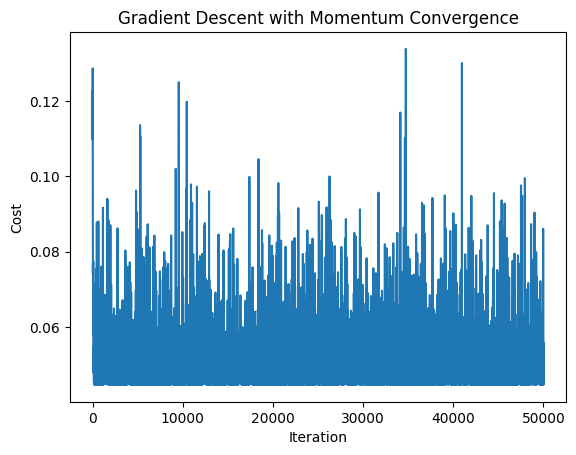

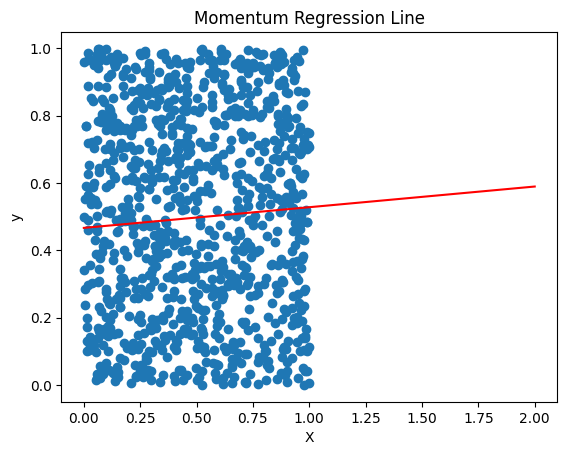

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.01
n_epochs = 50
m = 1000
momentum = 0.9

theta = np.random.randn(2, 1)
v = np.zeros_like(theta)

# Gradient Descent with Momentum
costs = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        v = momentum * v + eta * gradients
        theta = theta - v
        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)

print("Theta (Momentum):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Gradient Descent with Momentum Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Momentum Regression Line")
plt.show()


### Nesterov Accelerated Gradient (NAG)

#### Definition

Nesterov Accelerated Gradient (NAG) is a modification of momentum that looks ahead by calculating the gradient at the predicted future position of the parameters, rather than at the current position. This approach can lead to faster and more stable convergence.

#### Features

- Generally faster and more stable than standard momentum methods.

#### Initialization

- **Learning Rate (α):** Same as in standard gradient descent.
- **Momentum (β):** Same as in standard momentum (typically between 0 and 1, e.g., 0.9).
- **Initial Parameters (θ):** Similar to standard gradient descent.
- **Initial Velocity (v):** Initialized to zero.

#### Advantages

- Faster convergence compared to standard momentum.
- Improved stability.

#### Drawbacks

- More complex to implement compared to standard momentum.
- Hyperparameters still require careful tuning.

#### Mathematical Notation

The update rules for Nesterov Accelerated Gradient are:

θ_temp = θ - β · vₜ₋₁  
vₜ = β · vₜ₋₁ + α · ∇J(θ_temp)  
θ = θ - vₜ

Where:

- **θ_temp:** Temporary parameters representing the look-ahead position.
- **vₜ:** Velocity vector at time step t.
- **β:** Momentum coefficient.
- **α:** Learning rate.
- **∇J(θ_temp):** Gradient of the cost function evaluated at the look-ahead position.

Theta (NAG): [[0.46813799]
 [0.06010416]]


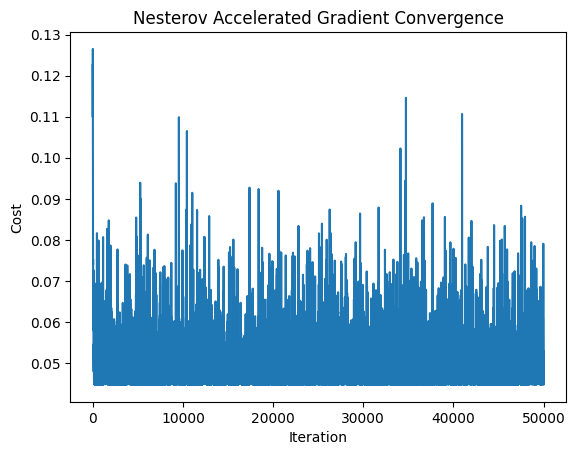

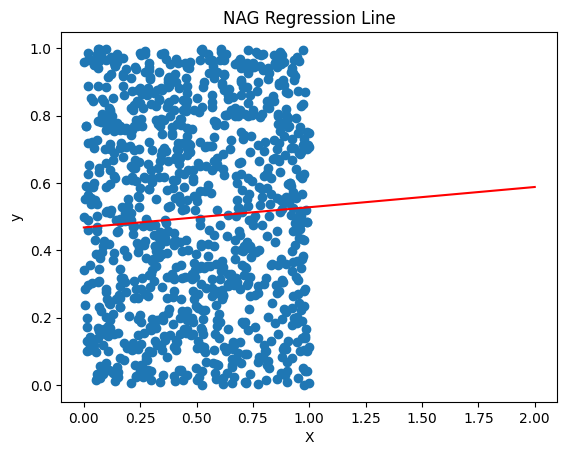

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.01
n_epochs = 50
m = 1000
momentum = 0.9

theta = np.random.randn(2, 1)
v = np.zeros_like(theta)

# Nesterov Accelerated Gradient
costs = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        theta_temp = theta - momentum * v  # Look ahead
        gradients = 2 * xi.T.dot(xi.dot(theta_temp) - yi)
        v = momentum * v + eta * gradients
        theta = theta - v

        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)

print("Theta (NAG):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Nesterov Accelerated Gradient Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("NAG Regression Line")
plt.show()

<!-- filepath: adagrad.md -->

### Adagrad (Adaptive Gradient Algorithm)

#### Definition

Adagrad adapts the learning rate to each parameter based on the historical sum of squared gradients. Parameters that have received large gradients in the past will have their learning rates reduced more, while parameters that have received small gradients will have their learning rates reduced less.

#### Features

- Adaptive learning rates for each parameter.
- Suitable for sparse data.

#### Initialization

- **Learning Rate (α):** Often a relatively large initial learning rate is used.
- **Epsilon (ε):** A small constant (e.g., 1e-8) added to the denominator to prevent division by zero.
- **Initial Parameters (θ):** Similar to standard gradient descent.
- **Sum of Squared Gradients (G):** Initialized to zero.

#### Advantages

- Automatically adapts the learning rate for each parameter, which can lead to faster convergence.
- Well-suited for sparse data.

#### Drawbacks

- The learning rate can decrease too quickly, which may lead to premature stopping.
- May not perform well in non-convex optimization problems.

#### Mathematical Notation

The update rules for Adagrad are as follows:

Gₜ = Gₜ₋₁ + ∇J(θ)² _(element-wise square)_  
θ = θ - (α / √(Gₜ + ε)) * ∇J(θ)

Where:

- **Gₜ:** Sum of squared gradients up to time step t (with element-wise operations).
- **ε:** A small constant to prevent division by zero.
- **α:** Global learning rate.

Theta (Adagrad): [[0.50402901]
 [0.00710647]]


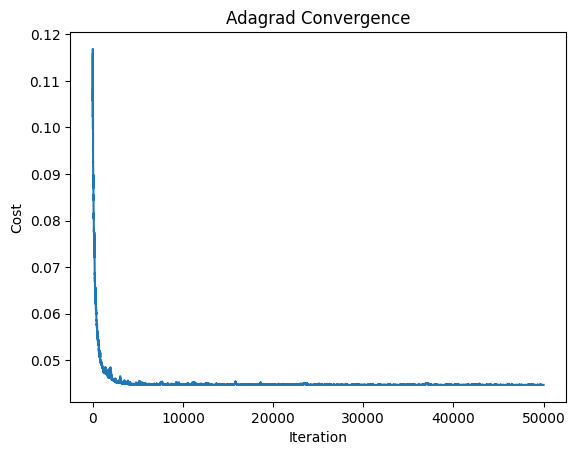

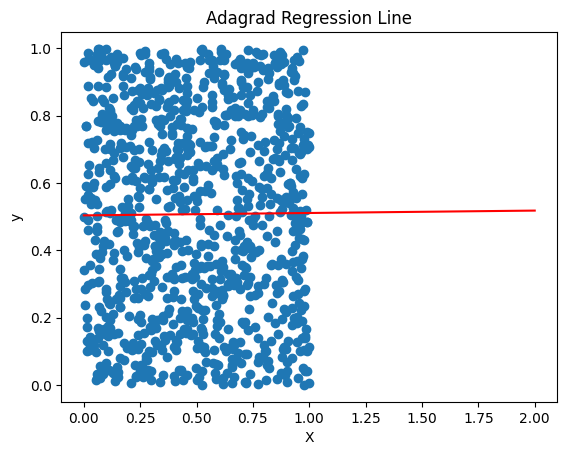

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.1
n_epochs = 50
m = 1000
epsilon = 1e-8

theta = np.random.randn(2, 1)
G = np.zeros_like(theta)

# Adagrad
costs = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        G = G + gradients**2
        theta = theta - (eta / np.sqrt(G + epsilon)) * gradients
        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)

print("Theta (Adagrad):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Adagrad Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Adagrad Regression Line")
plt.show()

<!-- filepath: rmsprop.md -->

### RMSprop (Root Mean Square Propagation)

#### Definition

RMSprop addresses Adagrad's diminishing learning rate problem by using a decaying average of squared gradients instead of the sum of squared gradients. This allows the learning rate to adapt to the recent history of gradients.

#### Features

- Adaptive learning rates for each parameter.
- Similar to Adagrad but mitigates the vanishing learning rate problem.
- Effective for non-convex optimization.

#### Initialization

- **Learning Rate (α):** Same as Adagrad.
- **Decay Rate (β):** A hyperparameter that controls the decay of the moving average (typically 0.9).
- **Epsilon (ε):** A small constant (e.g., 1e-8) added to prevent division by zero.
- **Moving Average of Squared Gradients (S):** Initialized to zero.

#### Advantages

- Addresses the vanishing learning rate problem present in Adagrad.
- More robust in non-convex optimization problems.

#### Drawbacks

- Introduces a new hyperparameter (β) that requires tuning.

#### Mathematical Notation

The update rules for RMSprop are as follows:

Sₜ = βSₜ₋₁ + (1 - β)∇J(θ)²  
θ = θ - (α / √(Sₜ + ε)) * ∇J(θ)

Where:

- **Sₜ:** Moving average of squared gradients.
- **β:** Decay rate.
- **ε:** Small constant to prevent division by zero.
- **α:** Global learning rate.

Theta (RMSprop): [[0.49415817]
 [0.02008483]]


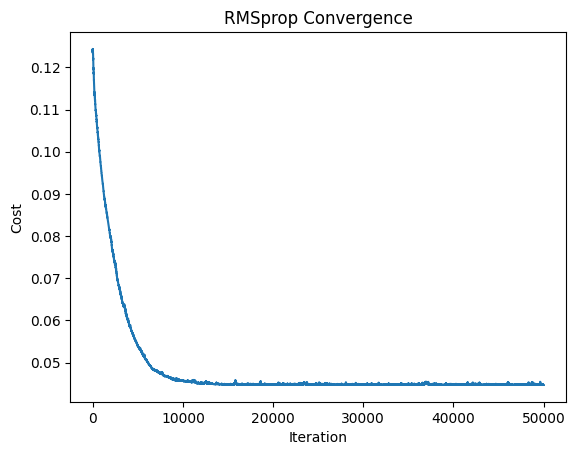

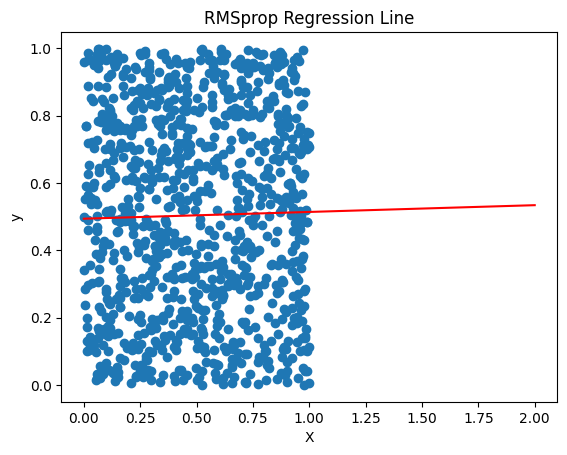

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.001
n_epochs = 50
m = 1000
beta = 0.9
epsilon = 1e-8

theta = np.random.randn(2, 1)
S = np.zeros_like(theta)

# RMSprop
costs = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        S = beta * S + (1 - beta) * gradients**2
        theta = theta - (eta / np.sqrt(S + epsilon)) * gradients
        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)

print("Theta (RMSprop):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("RMSprop Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("RMSprop Regression Line")
plt.show()

<!-- filepath: adam.md -->

### Adam (Adaptive Moment Estimation)

#### Definition

Adam combines the ideas of momentum and RMSprop. It computes adaptive learning rates for each parameter using both the first moment (mean) and the second moment (uncentered variance) of the gradients.

#### Features

- Combines the benefits of momentum and adaptive learning rates.
- Often performs well out-of-the-box without extensive hyperparameter tuning.

#### Initialization

- **Learning Rate (α):** Typically 0.001.
- **Beta1 (β₁):** Exponential decay rate for the first moment estimates (typically 0.9).
- **Beta2 (β₂):** Exponential decay rate for the second moment estimates (typically 0.999).
- **Epsilon (ε):** A small constant (typically 1e-8) to prevent division by zero.
- **First Moment (m):** Initialized to zero.
- **Second Moment (v):** Initialized to zero.

#### Advantages

- Often converges quickly.
- Requires relatively little hyperparameter tuning.
- Works well in practice.

#### Drawbacks

- Can be sensitive to the choice of hyperparameters in some cases.

#### Mathematical Notation

The update rules for Adam are defined as:

mₜ = β₁ mₜ₋₁ + (1 - β₁) ∇J(θ)  
vₜ = β₂ vₜ₋₁ + (1 - β₂) ∇J(θ)²

Bias-corrected estimates:  
m̂ₜ = mₜ / (1 - β₁ᵗ)  
v̂ₜ = vₜ / (1 - β₂ᵗ)

Parameter update:  
θ = θ - (α / √(v̂ₜ + ε)) * m̂ₜ

Where:

- **mₜ:** Exponential moving average of the gradient (first moment).
- **vₜ:** Exponential moving average of the squared gradient (second moment).
- **m̂ₜ, v̂ₜ:** Bias-corrected estimates of the first and second moments.
- **β₁, β₂:** Decay rates.
- **ε:** Small constant.
- **α:** Global learning rate.

Theta (Adam): [[0.49901018]
 [0.01694847]]


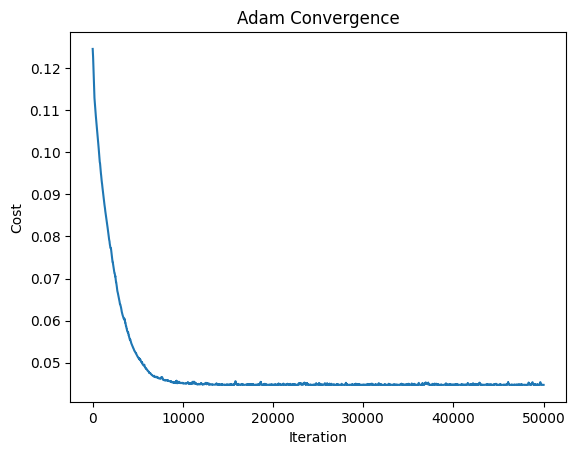

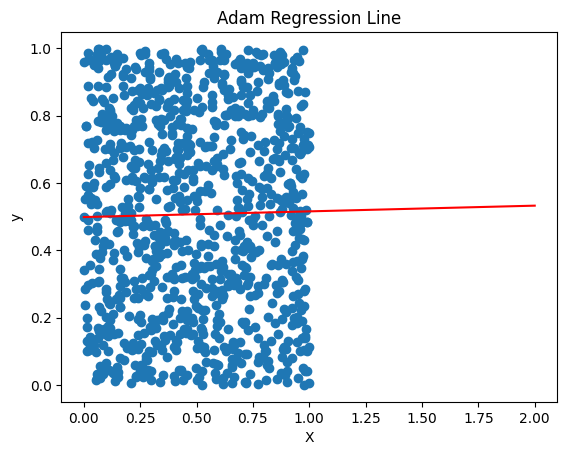

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (same as before)
np.random.seed(0)
X = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
X_b = np.c_[np.ones((1000, 1)), X]

# Initialization
eta = 0.001
n_epochs = 50
m = 1000
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

theta = np.random.randn(2, 1)
m_t = np.zeros_like(theta)
v_t = np.zeros_like(theta)

# Adam
costs = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * gradients**2

        m_hat = m_t / (1 - beta1**(epoch * m + i + 1))  # Correcting bias
        v_hat = v_t / (1 - beta2**(epoch * m + i + 1))

        theta = theta - (eta / (np.sqrt(v_hat) + epsilon)) * m_hat

        y_pred = X_b.dot(theta)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)  # Mean Squared Error
        costs.append(cost)

print("Theta (Adam):", theta)

# Plot the convergence curve
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Adam Convergence")
plt.show()

# Plot the data and the regression line
plt.scatter(X, y)
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_predict = X_plot_b.dot(theta)
plt.plot(X_plot, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Adam Regression Line")
plt.show()